[View in Colaboratory](https://colab.research.google.com/github/Scottdyt/ClassProject/blob/master/naive%20CNN.ipynb)

# CIFAR - 10(PART.1)
1015303105 杜云滔
# naive CNN

# using Google GPU

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpp7bcxtga/pubring.gpg' created
gpg: /tmp/tmpp7bcxtga/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [6]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [7]:
import os
path = "/content/drive/cifar10"
os.chdir(path)

# Imports packages and functions

In [8]:
%matplotlib inline
%config InlineBackend.figure_format="svg"
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [9]:
matplotlib.style.use('ggplot')

In [10]:
from functions import get_class_names, get_train_data, get_test_data, plot_images, plot_model,error_plot,predict_classes

# Get data

## Class names and constant

In [11]:
class_names = get_class_names()
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [12]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3

## Get number of classes

In [13]:
num_classes = len(class_names)
print(num_classes)

10


### Load the training dataset ``train_class`` is one hot vector

In [14]:
train_images, train_labels, train_class = get_train_data()

inspect labels

In [15]:
print(train_labels)

[6 9 9 ... 9 1 1]


inspect one hot label

In [16]:
print(train_class)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Load the test data

In [17]:
test_images, test_labels, test_class = get_test_data()

In [18]:
print("Training dataset size: ",len(train_images))
print("Testing dataset size: ",len(test_images))

Training dataset size:  50000
Testing dataset size:  10000


successful load data and labels！

# naive CNN model

contain 4 Convolutional Neural Network and 2 Dense, using Dropout and MaxPooling2D

In [19]:
def build_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [20]:
model = build_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

## Train model 

### using checkPoint to save the model after every epoch

In [21]:
checkpoint = ModelCheckpoint('model/naive_CNN.h5',  monitor='val_loss', verbose=0, save_best_only= True, mode='auto') 

``categorical_crossentropy`` loss function is often used in multi-classification

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy']) 

### train data

In [23]:
model_info = model.fit(train_images, train_class,batch_size = 128, epochs = 100, validation_data= (test_images, test_class),callbacks=[checkpoint],verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 28s 568us/step - loss: 1.6122 - acc: 0.4088 - val_loss: 1.2681 - val_acc: 0.5482
Epoch 2/100
23552/50000 [=============>................] - ETA: 12s - loss: 1.2857 - acc: 0.5378

50000/50000 [==============================] - 25s 491us/step - loss: 1.2248 - acc: 0.5605 - val_loss: 1.0816 - val_acc: 0.6130
Epoch 3/100
50000/50000 [==============================] - 22s 435us/step - loss: 1.0519 - acc: 0.6268 - val_loss: 0.9198 - val_acc: 0.6783
Epoch 4/100
 3328/50000 [>.............................] - ETA: 18s - loss: 0.9649 - acc: 0.6611

50000/50000 [==============================] - 24s 488us/step - loss: 0.9301 - acc: 0.6733 - val_loss: 0.8259 - val_acc: 0.7102
Epoch 5/100
46720/50000 [===========================>..] - ETA: 1s - loss: 0.8533 - acc: 0.6989

50000/50000 [==============================] - 24s 488us/step - loss: 0.8513 - acc: 0.6996 - val_loss: 0.7601 - val_acc: 0.7324
Epoch 6/100
50000/50000 [==============================] - 24s 490us/step - loss: 0.7878 - acc: 0.7238 - val_loss: 0.7503 - val_acc: 0.7406
Epoch 7/100
 6912/50000 [===>..........................] - ETA: 19s - loss: 0.7401 - acc: 0.7383

50000/50000 [==============================] - 25s 490us/step - loss: 0.7384 - acc: 0.7411 - val_loss: 0.7040 - val_acc: 0.7504
Epoch 8/100
50000/50000 [==============================] - 19s 384us/step - loss: 0.6957 - acc: 0.7545 - val_loss: 0.7212 - val_acc: 0.7473
Epoch 9/100
 3712/50000 [=>............................] - ETA: 21s - loss: 0.6394 - acc: 0.7751

50000/50000 [==============================] - 24s 490us/step - loss: 0.6652 - acc: 0.7667 - val_loss: 0.6691 - val_acc: 0.7716
Epoch 10/100
43776/50000 [=========================>....] - ETA: 2s - loss: 0.6300 - acc: 0.7770

50000/50000 [==============================] - 25s 494us/step - loss: 0.6314 - acc: 0.7764 - val_loss: 0.6457 - val_acc: 0.7775
Epoch 11/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.6045 - acc: 0.7859 - val_loss: 0.6427 - val_acc: 0.7809
Epoch 12/100
 5632/50000 [==>...........................] - ETA: 19s - loss: 0.5842 - acc: 0.7919

50000/50000 [==============================] - 24s 487us/step - loss: 0.5850 - acc: 0.7936 - val_loss: 0.6310 - val_acc: 0.7834
Epoch 13/100
50000/50000 [==============================] - 22s 433us/step - loss: 0.5568 - acc: 0.8035 - val_loss: 0.6210 - val_acc: 0.7877
Epoch 14/100
  896/50000 [..............................] - ETA: 21s - loss: 0.5648 - acc: 0.7969

50000/50000 [==============================] - 24s 489us/step - loss: 0.5349 - acc: 0.8110 - val_loss: 0.6227 - val_acc: 0.7883
Epoch 15/100
44288/50000 [=========================>....] - ETA: 2s - loss: 0.5168 - acc: 0.8165

50000/50000 [==============================] - 24s 482us/step - loss: 0.5155 - acc: 0.8170 - val_loss: 0.6199 - val_acc: 0.7886
Epoch 16/100
50000/50000 [==============================] - 25s 497us/step - loss: 0.5030 - acc: 0.8205 - val_loss: 0.6182 - val_acc: 0.7911
Epoch 17/100
 4736/50000 [=>............................] - ETA: 20s - loss: 0.4564 - acc: 0.8328

50000/50000 [==============================] - 22s 438us/step - loss: 0.4923 - acc: 0.8262 - val_loss: 0.6223 - val_acc: 0.7889
Epoch 18/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.4720 - acc: 0.8346 - val_loss: 0.6125 - val_acc: 0.7935
Epoch 19/100
 2304/50000 [>.............................] - ETA: 22s - loss: 0.4542 - acc: 0.8455

50000/50000 [==============================] - 25s 496us/step - loss: 0.4564 - acc: 0.8381 - val_loss: 0.6140 - val_acc: 0.7953
Epoch 20/100
43008/50000 [========================>.....] - ETA: 3s - loss: 0.4384 - acc: 0.8434

50000/50000 [==============================] - 24s 489us/step - loss: 0.4401 - acc: 0.8428 - val_loss: 0.6332 - val_acc: 0.7879
Epoch 21/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.4216 - acc: 0.8498 - val_loss: 0.6164 - val_acc: 0.7966
Epoch 22/100
 5632/50000 [==>...........................] - ETA: 20s - loss: 0.4062 - acc: 0.8510

50000/50000 [==============================] - 25s 494us/step - loss: 0.4189 - acc: 0.8516 - val_loss: 0.6172 - val_acc: 0.7965
Epoch 23/100
50000/50000 [==============================] - 18s 365us/step - loss: 0.3988 - acc: 0.8562 - val_loss: 0.6067 - val_acc: 0.8001
Epoch 24/100
 4096/50000 [=>............................] - ETA: 21s - loss: 0.3689 - acc: 0.8730

50000/50000 [==============================] - 25s 490us/step - loss: 0.3976 - acc: 0.8576 - val_loss: 0.6310 - val_acc: 0.7962
Epoch 25/100
44032/50000 [=========================>....] - ETA: 2s - loss: 0.3883 - acc: 0.8614

50000/50000 [==============================] - 25s 491us/step - loss: 0.3908 - acc: 0.8603 - val_loss: 0.6263 - val_acc: 0.7926
Epoch 26/100
50000/50000 [==============================] - 25s 494us/step - loss: 0.3825 - acc: 0.8628 - val_loss: 0.6057 - val_acc: 0.7998
Epoch 27/100
 5248/50000 [==>...........................] - ETA: 20s - loss: 0.3337 - acc: 0.8790

50000/50000 [==============================] - 24s 481us/step - loss: 0.3649 - acc: 0.8685 - val_loss: 0.6124 - val_acc: 0.8016
Epoch 28/100
42880/50000 [========================>.....] - ETA: 3s - loss: 0.3647 - acc: 0.8681

50000/50000 [==============================] - 25s 490us/step - loss: 0.3662 - acc: 0.8674 - val_loss: 0.6180 - val_acc: 0.8012
Epoch 29/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.3541 - acc: 0.8747 - val_loss: 0.6155 - val_acc: 0.7999
Epoch 30/100
 5376/50000 [==>...........................] - ETA: 21s - loss: 0.3320 - acc: 0.8778

50000/50000 [==============================] - 25s 492us/step - loss: 0.3549 - acc: 0.8732 - val_loss: 0.6245 - val_acc: 0.8016
Epoch 31/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.3420 - acc: 0.8778

50000/50000 [==============================] - 25s 496us/step - loss: 0.3411 - acc: 0.8779 - val_loss: 0.6239 - val_acc: 0.8047
Epoch 32/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.3373 - acc: 0.8800 - val_loss: 0.6274 - val_acc: 0.8043
Epoch 33/100
 5376/50000 [==>...........................] - ETA: 20s - loss: 0.3210 - acc: 0.8830

50000/50000 [==============================] - 24s 484us/step - loss: 0.3308 - acc: 0.8815 - val_loss: 0.6224 - val_acc: 0.8009
Epoch 34/100
44672/50000 [=========================>....] - ETA: 2s - loss: 0.3200 - acc: 0.8851

50000/50000 [==============================] - 24s 490us/step - loss: 0.3242 - acc: 0.8834 - val_loss: 0.6243 - val_acc: 0.8029
Epoch 35/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.3217 - acc: 0.8847 - val_loss: 0.6296 - val_acc: 0.8019
Epoch 36/100
 5120/50000 [==>...........................] - ETA: 20s - loss: 0.2925 - acc: 0.8918

50000/50000 [==============================] - 25s 492us/step - loss: 0.3139 - acc: 0.8883 - val_loss: 0.6394 - val_acc: 0.8018
Epoch 37/100
45056/50000 [==========================>...] - ETA: 2s - loss: 0.3109 - acc: 0.8888

50000/50000 [==============================] - 24s 490us/step - loss: 0.3109 - acc: 0.8887 - val_loss: 0.6479 - val_acc: 0.8024
Epoch 38/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.3122 - acc: 0.8884 - val_loss: 0.6313 - val_acc: 0.8008
Epoch 39/100
 6144/50000 [==>...........................] - ETA: 19s - loss: 0.2860 - acc: 0.8910

50000/50000 [==============================] - 21s 430us/step - loss: 0.3051 - acc: 0.8907 - val_loss: 0.6416 - val_acc: 0.8021
Epoch 40/100
50000/50000 [==============================] - 21s 416us/step - loss: 0.3061 - acc: 0.8911 - val_loss: 0.6469 - val_acc: 0.7994
Epoch 41/100
 2176/50000 [>.............................] - ETA: 23s - loss: 0.2785 - acc: 0.8980

50000/50000 [==============================] - 25s 494us/step - loss: 0.3013 - acc: 0.8935 - val_loss: 0.6321 - val_acc: 0.8030
Epoch 42/100
42112/50000 [========================>.....] - ETA: 3s - loss: 0.2848 - acc: 0.8980

50000/50000 [==============================] - 25s 493us/step - loss: 0.2894 - acc: 0.8972 - val_loss: 0.6645 - val_acc: 0.7953
Epoch 43/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.2855 - acc: 0.8989 - val_loss: 0.6696 - val_acc: 0.7977
Epoch 44/100
 5376/50000 [==>...........................] - ETA: 21s - loss: 0.2831 - acc: 0.9014

50000/50000 [==============================] - 25s 491us/step - loss: 0.2936 - acc: 0.8956 - val_loss: 0.6266 - val_acc: 0.8066
Epoch 45/100
43392/50000 [=========================>....] - ETA: 3s - loss: 0.2816 - acc: 0.9009

50000/50000 [==============================] - 25s 494us/step - loss: 0.2839 - acc: 0.8999 - val_loss: 0.6619 - val_acc: 0.8023
Epoch 46/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.2840 - acc: 0.8989 - val_loss: 0.6609 - val_acc: 0.7981
Epoch 47/100
 5632/50000 [==>...........................] - ETA: 20s - loss: 0.2633 - acc: 0.9082

50000/50000 [==============================] - 25s 495us/step - loss: 0.2828 - acc: 0.8987 - val_loss: 0.6419 - val_acc: 0.8031
Epoch 48/100
45568/50000 [==========================>...] - ETA: 2s - loss: 0.2737 - acc: 0.9017

50000/50000 [==============================] - 25s 492us/step - loss: 0.2748 - acc: 0.9013 - val_loss: 0.6725 - val_acc: 0.8007
Epoch 49/100
50000/50000 [==============================] - 24s 488us/step - loss: 0.2732 - acc: 0.9041 - val_loss: 0.6515 - val_acc: 0.8056
Epoch 50/100
 6400/50000 [==>...........................] - ETA: 20s - loss: 0.2700 - acc: 0.9053

50000/50000 [==============================] - 25s 495us/step - loss: 0.2692 - acc: 0.9062 - val_loss: 0.6336 - val_acc: 0.8133
Epoch 51/100
43776/50000 [=========================>....] - ETA: 2s - loss: 0.2647 - acc: 0.9058

50000/50000 [==============================] - 25s 491us/step - loss: 0.2662 - acc: 0.9052 - val_loss: 0.6754 - val_acc: 0.8033
Epoch 52/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.2725 - acc: 0.9042 - val_loss: 0.6408 - val_acc: 0.8038
Epoch 53/100
 5632/50000 [==>...........................] - ETA: 20s - loss: 0.2494 - acc: 0.9105

50000/50000 [==============================] - 25s 493us/step - loss: 0.2636 - acc: 0.9065 - val_loss: 0.6383 - val_acc: 0.8086
Epoch 54/100
44288/50000 [=========================>....] - ETA: 2s - loss: 0.2618 - acc: 0.9064

50000/50000 [==============================] - 24s 487us/step - loss: 0.2621 - acc: 0.9069 - val_loss: 0.6747 - val_acc: 0.8059
Epoch 55/100
50000/50000 [==============================] - 24s 488us/step - loss: 0.2549 - acc: 0.9095 - val_loss: 0.6614 - val_acc: 0.8017
Epoch 56/100
 5760/50000 [==>...........................] - ETA: 20s - loss: 0.2523 - acc: 0.9089

50000/50000 [==============================] - 24s 488us/step - loss: 0.2568 - acc: 0.9090 - val_loss: 0.6697 - val_acc: 0.8059
Epoch 57/100
45696/50000 [==========================>...] - ETA: 1s - loss: 0.2538 - acc: 0.9104

50000/50000 [==============================] - 25s 491us/step - loss: 0.2540 - acc: 0.9104 - val_loss: 0.6461 - val_acc: 0.8084
Epoch 58/100
50000/50000 [==============================] - 24s 484us/step - loss: 0.2604 - acc: 0.9070 - val_loss: 0.6563 - val_acc: 0.8049
Epoch 59/100
 6656/50000 [==>...........................] - ETA: 20s - loss: 0.2407 - acc: 0.9154

50000/50000 [==============================] - 24s 489us/step - loss: 0.2532 - acc: 0.9104 - val_loss: 0.6689 - val_acc: 0.8050
Epoch 60/100
45568/50000 [==========================>...] - ETA: 2s - loss: 0.2466 - acc: 0.9134

50000/50000 [==============================] - 25s 491us/step - loss: 0.2474 - acc: 0.9133 - val_loss: 0.6802 - val_acc: 0.8011
Epoch 61/100
50000/50000 [==============================] - 24s 490us/step - loss: 0.2462 - acc: 0.9114 - val_loss: 0.6838 - val_acc: 0.8082
Epoch 62/100
 6016/50000 [==>...........................] - ETA: 19s - loss: 0.2380 - acc: 0.9156

50000/50000 [==============================] - 20s 397us/step - loss: 0.2508 - acc: 0.9121 - val_loss: 0.6581 - val_acc: 0.8061
Epoch 63/100
50000/50000 [==============================] - 23s 466us/step - loss: 0.2459 - acc: 0.9139 - val_loss: 0.6578 - val_acc: 0.8052
Epoch 64/100
  128/50000 [..............................] - ETA: 22s - loss: 0.1663 - acc: 0.9297

50000/50000 [==============================] - 25s 490us/step - loss: 0.2439 - acc: 0.9139 - val_loss: 0.6787 - val_acc: 0.8121
Epoch 65/100
42240/50000 [========================>.....] - ETA: 3s - loss: 0.2388 - acc: 0.9159

50000/50000 [==============================] - 25s 491us/step - loss: 0.2395 - acc: 0.9156 - val_loss: 0.6939 - val_acc: 0.8076
Epoch 66/100
50000/50000 [==============================] - 25s 495us/step - loss: 0.2373 - acc: 0.9166 - val_loss: 0.6891 - val_acc: 0.8024
Epoch 67/100
 5120/50000 [==>...........................] - ETA: 20s - loss: 0.2343 - acc: 0.9199

50000/50000 [==============================] - 24s 490us/step - loss: 0.2426 - acc: 0.9137 - val_loss: 0.6650 - val_acc: 0.8039
Epoch 68/100
48768/50000 [============================>.] - ETA: 0s - loss: 0.2358 - acc: 0.9158

50000/50000 [==============================] - 21s 415us/step - loss: 0.2356 - acc: 0.9158 - val_loss: 0.6424 - val_acc: 0.8081
Epoch 69/100
50000/50000 [==============================] - 22s 444us/step - loss: 0.2383 - acc: 0.9169 - val_loss: 0.6706 - val_acc: 0.8053
Epoch 70/100
 9984/50000 [====>.........................] - ETA: 18s - loss: 0.2361 - acc: 0.9184

50000/50000 [==============================] - 24s 489us/step - loss: 0.2422 - acc: 0.9153 - val_loss: 0.6530 - val_acc: 0.8048
Epoch 71/100
45696/50000 [==========================>...] - ETA: 1s - loss: 0.2289 - acc: 0.9189

50000/50000 [==============================] - 25s 493us/step - loss: 0.2294 - acc: 0.9187 - val_loss: 0.6898 - val_acc: 0.8063
Epoch 72/100
50000/50000 [==============================] - 25s 496us/step - loss: 0.2298 - acc: 0.9194 - val_loss: 0.7016 - val_acc: 0.8018
Epoch 73/100
 5888/50000 [==>...........................] - ETA: 20s - loss: 0.2235 - acc: 0.9231

50000/50000 [==============================] - 25s 490us/step - loss: 0.2302 - acc: 0.9183 - val_loss: 0.6676 - val_acc: 0.8084
Epoch 74/100
46720/50000 [===========================>..] - ETA: 1s - loss: 0.2310 - acc: 0.9199

50000/50000 [==============================] - 22s 432us/step - loss: 0.2312 - acc: 0.9199 - val_loss: 0.6835 - val_acc: 0.8023
Epoch 75/100
50000/50000 [==============================] - 21s 427us/step - loss: 0.2241 - acc: 0.9213 - val_loss: 0.6839 - val_acc: 0.8026
Epoch 76/100
 9856/50000 [====>.........................] - ETA: 18s - loss: 0.2139 - acc: 0.9219

50000/50000 [==============================] - 24s 489us/step - loss: 0.2239 - acc: 0.9210 - val_loss: 0.6999 - val_acc: 0.8039
Epoch 77/100
48256/50000 [===========================>..] - ETA: 0s - loss: 0.2226 - acc: 0.9222

50000/50000 [==============================] - 24s 489us/step - loss: 0.2237 - acc: 0.9217 - val_loss: 0.6959 - val_acc: 0.8036
Epoch 78/100
50000/50000 [==============================] - 25s 490us/step - loss: 0.2206 - acc: 0.9232 - val_loss: 0.6545 - val_acc: 0.8068
Epoch 79/100
 6656/50000 [==>...........................] - ETA: 20s - loss: 0.2042 - acc: 0.9289

50000/50000 [==============================] - 24s 489us/step - loss: 0.2236 - acc: 0.9230 - val_loss: 0.6606 - val_acc: 0.8106
Epoch 80/100
43776/50000 [=========================>....] - ETA: 2s - loss: 0.2190 - acc: 0.9228

50000/50000 [==============================] - 25s 494us/step - loss: 0.2193 - acc: 0.9226 - val_loss: 0.7128 - val_acc: 0.8025
Epoch 81/100
50000/50000 [==============================] - 24s 490us/step - loss: 0.2240 - acc: 0.9217 - val_loss: 0.6993 - val_acc: 0.8078
Epoch 82/100
 6144/50000 [==>...........................] - ETA: 19s - loss: 0.2267 - acc: 0.9212

50000/50000 [==============================] - 25s 490us/step - loss: 0.2203 - acc: 0.9231 - val_loss: 0.6645 - val_acc: 0.8081
Epoch 83/100
44032/50000 [=========================>....] - ETA: 2s - loss: 0.2192 - acc: 0.9243

50000/50000 [==============================] - 24s 486us/step - loss: 0.2204 - acc: 0.9238 - val_loss: 0.7255 - val_acc: 0.8010
Epoch 84/100
50000/50000 [==============================] - 25s 494us/step - loss: 0.2134 - acc: 0.9260 - val_loss: 0.7156 - val_acc: 0.8065
Epoch 85/100
 5504/50000 [==>...........................] - ETA: 20s - loss: 0.2022 - acc: 0.9281

50000/50000 [==============================] - 25s 495us/step - loss: 0.2178 - acc: 0.9233 - val_loss: 0.6803 - val_acc: 0.8066
Epoch 86/100
43904/50000 [=========================>....] - ETA: 2s - loss: 0.2162 - acc: 0.9238

50000/50000 [==============================] - 25s 490us/step - loss: 0.2157 - acc: 0.9238 - val_loss: 0.6914 - val_acc: 0.8099
Epoch 87/100
50000/50000 [==============================] - 25s 499us/step - loss: 0.2118 - acc: 0.9258 - val_loss: 0.6808 - val_acc: 0.8052
Epoch 88/100
 4992/50000 [=>............................] - ETA: 20s - loss: 0.2131 - acc: 0.9253

50000/50000 [==============================] - 24s 487us/step - loss: 0.2146 - acc: 0.9253 - val_loss: 0.6826 - val_acc: 0.8086
Epoch 89/100
44800/50000 [=========================>....] - ETA: 2s - loss: 0.2194 - acc: 0.9234

50000/50000 [==============================] - 25s 492us/step - loss: 0.2177 - acc: 0.9237 - val_loss: 0.6773 - val_acc: 0.8074
Epoch 90/100
50000/50000 [==============================] - 24s 489us/step - loss: 0.2082 - acc: 0.9275 - val_loss: 0.7052 - val_acc: 0.8090
Epoch 91/100
 6016/50000 [==>...........................] - ETA: 19s - loss: 0.1851 - acc: 0.9335

50000/50000 [==============================] - 24s 481us/step - loss: 0.2121 - acc: 0.9261 - val_loss: 0.6970 - val_acc: 0.8034
Epoch 92/100
50000/50000 [==============================] - 19s 374us/step - loss: 0.2031 - acc: 0.9286 - val_loss: 0.6895 - val_acc: 0.8095
Epoch 93/100
 4864/50000 [=>............................] - ETA: 20s - loss: 0.2038 - acc: 0.9272

50000/50000 [==============================] - 24s 489us/step - loss: 0.2113 - acc: 0.9270 - val_loss: 0.6828 - val_acc: 0.8072
Epoch 94/100
44544/50000 [=========================>....] - ETA: 2s - loss: 0.2104 - acc: 0.9272

50000/50000 [==============================] - 24s 486us/step - loss: 0.2100 - acc: 0.9278 - val_loss: 0.7124 - val_acc: 0.8049
Epoch 95/100
50000/50000 [==============================] - 25s 492us/step - loss: 0.2000 - acc: 0.9294 - val_loss: 0.7233 - val_acc: 0.8040
Epoch 96/100
 6144/50000 [==>...........................] - ETA: 19s - loss: 0.1913 - acc: 0.9323

50000/50000 [==============================] - 24s 486us/step - loss: 0.2094 - acc: 0.9268 - val_loss: 0.6743 - val_acc: 0.8069
Epoch 97/100
44160/50000 [=========================>....] - ETA: 2s - loss: 0.2054 - acc: 0.9286

50000/50000 [==============================] - 25s 493us/step - loss: 0.2068 - acc: 0.9280 - val_loss: 0.7156 - val_acc: 0.8078
Epoch 98/100
50000/50000 [==============================] - 24s 487us/step - loss: 0.2024 - acc: 0.9286 - val_loss: 0.6767 - val_acc: 0.8082
Epoch 99/100
 5120/50000 [==>...........................] - ETA: 20s - loss: 0.1803 - acc: 0.9385

50000/50000 [==============================] - 25s 493us/step - loss: 0.1989 - acc: 0.9306 - val_loss: 0.7088 - val_acc: 0.8064
Epoch 100/100
44672/50000 [=========================>....] - ETA: 2s - loss: 0.2070 - acc: 0.9300

50000/50000 [==============================] - 24s 489us/step - loss: 0.2067 - acc: 0.9302 - val_loss: 0.7143 - val_acc: 0.8057


## Evaluate the model

In [24]:
scores = model.evaluate(test_images, test_class, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.57%


the naive CNN get 81.36% accuracy in test data,not bad

## Plot model accuracy and loss 

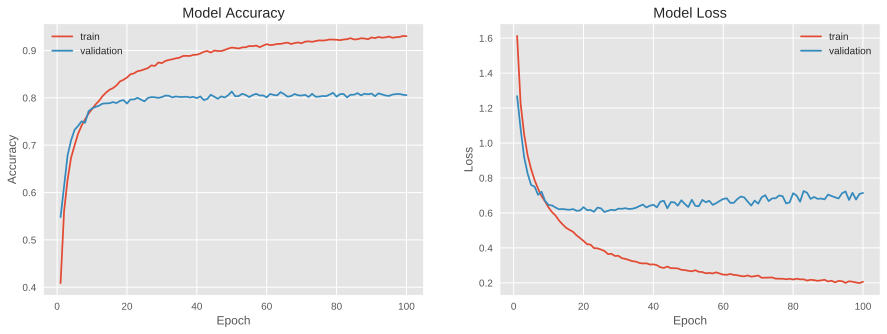

In [25]:
plot_model(model_info)

We can see from plot, the loss of train data is decreasing constantly, but test data is not. A little bit overfit.

# Prediction

## Get Prediction vector from model

In [26]:
class_predict = model.predict(test_images, batch_size=32)
print(class_predict[0])

[1.48728714e-06 2.68766034e-05 7.71344639e-06 8.80589664e-01
 5.12335134e-07 1.18843734e-01 4.31679509e-04 6.83079270e-05
 1.89003513e-05 1.12313073e-05]


## Get labels and prepare for plot

In [27]:
correct, predict_labels = predict_classes(model,test_images,test_labels)

In [28]:
print(correct)

[ True  True  True ...  True  True  True]


In [29]:
print(predict_labels)

[3 8 8 ... 5 1 7]


## show classifications result

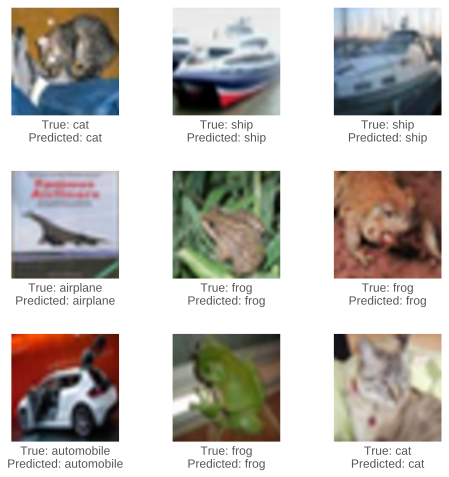

In [30]:
plot_images(images=test_images[0:9],
            true_labels=test_labels[0:9],
            class_names=class_names,
            labels_predict=predict_labels[0:9])

## show  wrong classifications

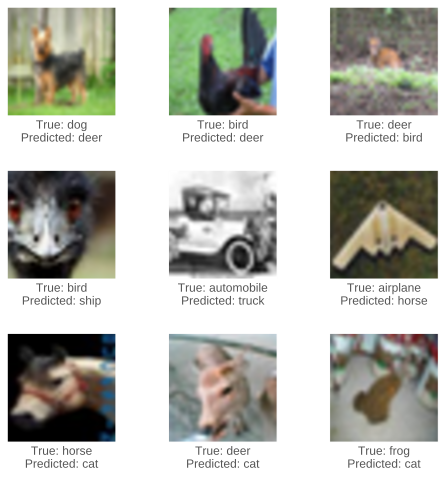

In [31]:
error_plot(test_images,test_labels,class_names,predict_labels,correct)